we need to make model to predict CO2 emissions 

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv("/content/drive/MyDrive/FuelConsumption.csv")
#reading csv file 

In [3]:
# take a look at the dataset
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


#data exploration

In [4]:
df.shape

(1067, 13)

In [5]:
# summarize the data
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [6]:
df.dtypes
#checking for datatypes

MODELYEAR                     int64
MAKE                         object
MODEL                        object
VEHICLECLASS                 object
ENGINESIZE                  float64
CYLINDERS                     int64
TRANSMISSION                 object
FUELTYPE                     object
FUELCONSUMPTION_CITY        float64
FUELCONSUMPTION_HWY         float64
FUELCONSUMPTION_COMB        float64
FUELCONSUMPTION_COMB_MPG      int64
CO2EMISSIONS                  int64
dtype: object

In [7]:
df1 = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
df1.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267


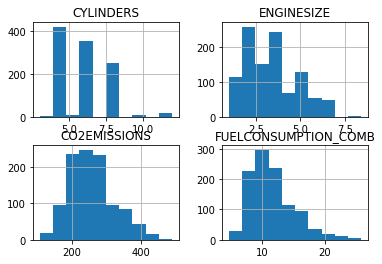

In [8]:
df1[['CYLINDERS','ENGINESIZE','CO2EMISSIONS','FUELCONSUMPTION_COMB']].hist()
plt.show()
#plot some imp features 

In [9]:
#check for relationship of these features with target feature i,eCO2EMISSION

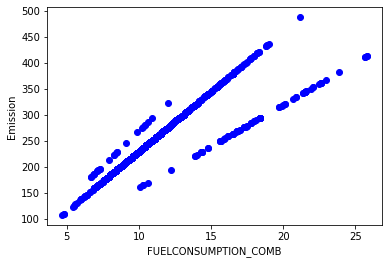

In [10]:
plt.scatter(df1.FUELCONSUMPTION_COMB, df1.CO2EMISSIONS,  color='blue')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission")
plt.show()
#in scatter plot always on vertical axis is target or dependent variable1

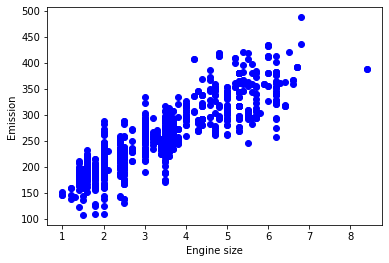

In [11]:
plt.scatter(df1.ENGINESIZE, df1.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

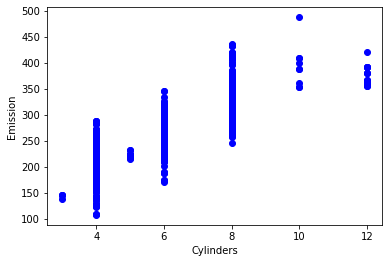

In [12]:
plt.scatter(df1.CYLINDERS, df1.CO2EMISSIONS, color='blue')
plt.xlabel("Cylinders")
plt.ylabel("Emission")
plt.show()

#Creating train and test dataset

*  split our dataset into train and test sets. 80% of the entire dataset will be used for training and 20% for testing



In [13]:
#using np.random.rand() function
n = np.random.rand(len(df)) < 0.8
train = df1[n]
test = df1[~n]

#simple regression model


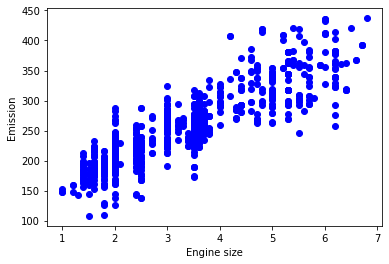

In [14]:
#checking train dataset distribuition using scatter plot 
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

In [15]:
#modelling
#using sckit learn package
from sklearn import linear_model

In [16]:
regr = linear_model.LinearRegression()
#linear regression object

In [17]:
#train_x is the predictor variable
train_x = train[['ENGINESIZE']]
#train_y is the target variable
train_y = train[['CO2EMISSIONS']]

In [18]:
regr.fit(train_x, train_y)
#fit the model

LinearRegression()

In [19]:
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[39.39925651]]
Intercept:  [124.66432273]


Text(0, 0.5, 'Emission')

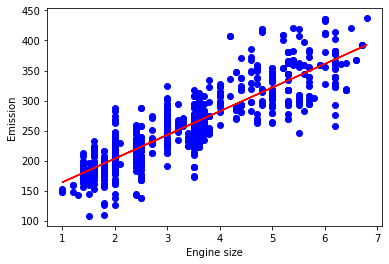

In [20]:
#plot fit line over data 
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')#for train dataset distribuition
plt.plot(train_x, regr.coef_*train_x + regr.intercept_,color='red')#for fit line with predictor variable and linear reg equation as parameters
plt.xlabel("Engine size")
plt.ylabel("Emission")

##evaluation

* compare the actual values and predicted values to calculate the accuracy of a regression model

*  There are different model evaluation metrics:-


> *   Mean Absolute Error
* Mean Squared Error (MSE)
> *   R-squared 

*  Here,let us use MSE and R^2 score to evaluate model

*  the model with the higher R-squared value is a better fit for the data

*  The best possible score is 1.0 and it can be negative (because the model can be worse)

*  the model with the smallest MSE value is a better fit for the data



















In [21]:
from sklearn.metrics import r2_score
#test_x and test_y are predictor and target variables 
test_x = test[['ENGINESIZE']]
test_y = test[['CO2EMISSIONS']]

#test_Y is the predicted value
prediction_y = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(prediction_y- test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((prediction_y - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , prediction_y) )

Mean absolute error: 24.85
Residual sum of squares (MSE): 1014.92
R2-score: 0.75


#multiple linear regression 

In [22]:
#same as simple regression 
from sklearn import linear_model
regr = linear_model.LinearRegression()

In [23]:
#multiple predictor variables
x = train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']]
y =train[['CO2EMISSIONS']]

In [24]:
regr.fit (x, y)
#fit the model

LinearRegression()

In [25]:
print ('Coefficients: ', regr.coef_)
print ('intercept: ', regr.intercept_)

Coefficients:  [[11.36355336  7.35878466  9.45033907]]
intercept:  [66.32686281]


In [26]:
#prediction
y_hat= regr.predict(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])

##evaluation


In [27]:
x = test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']]
y =test[['CO2EMISSIONS']]
print("Residual sum of squares: %.2f"% np.mean((y_hat - y) ** 2))


Residual sum of squares: 553.92


In [28]:
#variance regression score:- best possible score is 1.0, the lower values are worse

In [29]:
print('Variance score: %.2f' % regr.score(x, y))

Variance score: 0.86


#polynomial regression:-nonlinear regression

In [30]:
#already created train and test dataset

In [34]:
#PolynomialFeatures() function in Scikit-learn library, drives a new feature sets from the original feature set

In [35]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

In [37]:
train_x =train[['ENGINESIZE']]#predictor variable (independent) off train set
train_y = train[['CO2EMISSIONS']]#target variable 
#for test dataset
test_x = test[['ENGINESIZE']]
test_y = test[['CO2EMISSIONS']]


In [38]:
poly = PolynomialFeatures(degree=2)
train_x_poly = poly.fit_transform(train_x)
train_x_poly

array([[ 1.  ,  2.  ,  4.  ],
       [ 1.  ,  2.4 ,  5.76],
       [ 1.  ,  3.5 , 12.25],
       ...,
       [ 1.  ,  3.  ,  9.  ],
       [ 1.  ,  3.2 , 10.24],
       [ 1.  ,  3.2 , 10.24]])

In [39]:
#as polynomial regression is special type of linear regression we solve it with LinearRegression() fn 
m1= linear_model.LinearRegression()
train_y_ = m1.fit(train_x_poly, train_y)


In [40]:

# The coefficients and slope 
print ('Coefficients: ', m1.coef_)
print ('Intercept: ',m1.intercept_)
#dataframe is returned in output 

Coefficients:  [[ 0.         48.87628047 -1.28050642]]
Intercept:  [109.83295755]


In [41]:
# it is a typical multiple linear regression, with 3 parameters 9instead of features)
#so  parameters are intercept and coefficients of hyperplane

Text(0, 0.5, 'Emission')

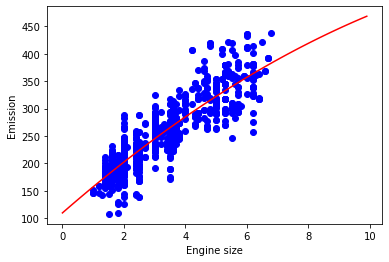

In [43]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
XX = np.arange(0.0, 10.0, 0.1)
#eqn is 𝑦=𝜃_0+𝜃_1𝑥_1+𝜃_2𝑥_2
#so from this eqn for red is written and also coeff and intercepts are in datafrime  
yy = m1.intercept_[0]+ m1.coef_[0][1]*XX+ m1.coef_[0][2]*np.power(XX, 2)
plt.plot(XX, yy, color='red' )

plt.xlabel("Engine size")
plt.ylabel("Emission")

#evaluation

In [48]:
from sklearn.metrics import r2_score
#transform is required to anlaysed non linearity to linearity poly3 = PolynomialFeatures(degree=3)
test_x_poly = poly.transform(test_x)
test_y_ = m1.predict(test_x_poly)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y,test_y_ ) )

Mean absolute error: 24.61
Residual sum of squares (MSE): 989.61
R2-score: 0.76


Coefficients:  [[ 0.         25.24503972  5.613302   -0.60733578]]
Intercept:  [133.75178564]
Mean absolute error: 24.29
Residual sum of squares (MSE): 981.63
R2-score: 0.76


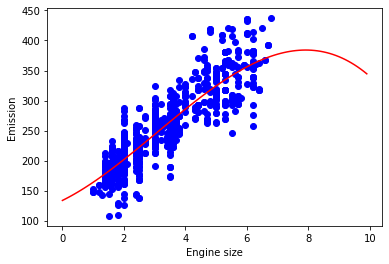

In [51]:
poly3 = PolynomialFeatures(degree=3)
train_x_poly3 = poly3.fit_transform(train_x)

clf3 = linear_model.LinearRegression()
train_y3_ = clf3.fit(train_x_poly3, train_y)

# The coefficients
print ('Coefficients: ', clf3.coef_)
print ('Intercept: ',clf3.intercept_)
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
XX = np.arange(0.0, 10.0, 0.1)
yy = clf3.intercept_[0]+ clf3.coef_[0][1]*XX + clf3.coef_[0][2]*np.power(XX, 2) + clf3.coef_[0][3]*np.power(XX, 3)
plt.plot(XX, yy, '-r' )
plt.xlabel("Engine size")
plt.ylabel("Emission")
test_x_poly3 = poly3.transform(test_x)
test_y3_ = clf3.predict(test_x_poly3)
print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y3_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y3_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y,test_y3_ ) )